In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroplan import Observer, FixedTarget
from astropy.time import Time
from astropy.table import Table

In [46]:
SUTHERLAND_OBSERVATORY = Observer.at_site('salt')
LIMITING_VISUAL_MAGNITUDE = 12
time_range = Time(["2015-08-01 06:00", "2015-08-02 12:00"])

In [52]:
eso_spectroscopic_standard_stars = Table.read(
    "eso_ra_ordered_spectrosopic_standards.txt", format="csv"
)

filtered_spectroscopic_standard_stars = eso_spectroscopic_standard_stars[
    eso_spectroscopic_standard_stars["visual_mag"] <= LIMITING_VISUAL_MAGNITUDE
]

spectral_standards_targets = [
    FixedTarget(
        coord=SkyCoord(ra_dec, unit=(u.hourangle, u.deg)),
        name=name
    )
    for name, ra_dec, visual_mag, spec_type, note in filtered_spectroscopic_standard_stars
]

print(filtered_spectroscopic_standard_stars)

   name         ra_dec_(J2000)     visual_mag spec_type Note
---------- ----------------------- ---------- --------- ----
    HR9087 00 01 49.42 -03 01 39.0       5.12     B7III   --
     HR153 00 36 58.30 +53 53 48.9       3.66      B2IV   --
 CD-34d241 00 41 46.92 -33 39 08.5      11.23         F    †
   LTT1020 01 54 49.68 -27 28 29.7      11.52         G   --
     HR718 02 28 09.54 +08 27 36.2       4.28     B9III   --
      EG21 03 10 30.98 -68 36 02.2      11.38        DA   --
    HR1544 04 50 36.69 +08 54 00.7       4.36       A1V   --
  G191-B2B 05 05 30.62 +52 49 54.0      11.78       DA1   --
    HR1996 05 45 59.92 -32 18 23.4       5.17       O9V Mod.
   HILT600 06 45 13.33 +02 08 14.1      10.44        B1   --
       ...                     ...        ...       ...  ...
    HR4963 13 09 56.96 -05 32 20.5       4.38      A1IV   --
      HZ44 13 23 35.37 +36 08 00.0      11.66       sdO   --
    HR5191 13 47 32.44 +49 18 48.0       1.86       B3V Mod.
CD-32d9927 14 11 46.37 -

In [36]:
from astroplan import (AltitudeConstraint, AirmassConstraint,AtNightConstraint)

constraints = [AltitudeConstraint(10*u.deg, 80*u.deg),
               AirmassConstraint(5), AtNightConstraint.twilight_astronomical()]

In [48]:
from astroplan import is_observable, is_always_observable
# Are targets *ever* observable in the time range?
ever_observable = is_observable(constraints, SUTHERLAND_OBSERVATORY, spectral_standards_targets, time_range=time_range)

# Are targets *always* observable in the time range?
always_observable = is_always_observable(constraints, SUTHERLAND_OBSERVATORY, spectral_standards_targets, time_range=time_range)




In [50]:
observability_table = Table()
observability_table['target'] = [target.name for target in spectral_standards_targets]
observability_table['ever_observable'] = ever_observable
observability_table['always_observable'] = always_observable
observability_table['Visual Mag'] = filtered_spectroscopic_standard_stars['visual_mag']
print(observability_table)

  target   ever_observable always_observable Visual Mag
---------- --------------- ----------------- ----------
    HR9087            True             False       5.12
     HR153           False             False       3.66
 CD-34d241            True             False      11.23
   LTT1020            True             False      11.52
     HR718            True             False       4.28
      EG21            True             False      11.38
    HR1544            True             False       4.36
  G191-B2B           False             False      11.78
    HR1996            True             False       5.17
   HILT600            True             False      10.44
       ...             ...               ...        ...
    HR4963            True             False       4.38
      HZ44            True             False      11.66
    HR5191           False             False       1.86
CD-32d9927            True             False      10.42
    HR5501            True             False    

In [40]:
from astroplan import observability_table
table = observability_table(constraints, SUTHERLAND_OBSERVATORY, spectral_standards_targets, time_range=time_range)
print(table)

target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
     HR9087            True             False                        0.25
      HR153           False             False                         0.0
      HR718            True             False                        0.15
     HR1544            True             False         0.06666666666666667
     HR1996            True             False                         0.1
    HILT600            True             False        0.016666666666666666
    HD49798            True             False         0.08333333333333333
    HD60753            True             False         0.08333333333333333
  BD+75d325           False             False                         0.0
     HR3454           False             False                         0.0
    HD93521           False             False                         0.0
     HR4468            True           

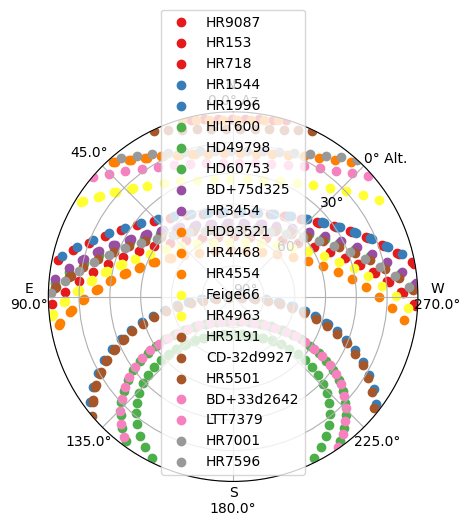

In [41]:
from astroplan.plots import plot_sky
from astroplan import Observer, FixedTarget

import matplotlib.pyplot as plt
from matplotlib import cm
from astropy.time import Time
from astropy.coordinates import SkyCoord
import astropy.units as u



# Get grid of times within the time_range limits
from astroplan import time_grid_from_range
time_grid = time_grid_from_range(time_range)

plt.figure(figsize=(6,6))
cmap = cm.Set1             # Cycle through this colormap

for i, target in enumerate(spectral_standards_targets):
    ax = plot_sky(target, SUTHERLAND_OBSERVATORY, time_grid,
                  style_kwargs=dict(color=cmap(float(i)/len(spectral_standards_targets)),
                                    label=target.name))

    legend = ax.legend(loc='lower center')
    legend.get_frame().set_facecolor('w')
    
    
plt.show()